# 🧠 XOR & Donut Problems: ทำไมต้องใช้ Neural Network?

**จุดประสงค์**: เข้าใจว่า Neural Network แก้ปัญหาที่ **Linear Models แก้ไม่ได้**

**โค้ดต้นฉบับ**: `machine_learning_examples-master/ann_class/xor_donut.py`

---

## 🎯 ทำไมต้องใช้ Neural Network?

### **Linear vs Non-Linear Problems**:

| Problem | Can Linear Model Solve? | Need Neural Network? |
|---------|------------------------|---------------------|
| **AND** | ✅ Yes | ❌ No |
| **OR** | ✅ Yes | ❌ No |
| **XOR** | ❌ **No!** | ✅ **Yes!** |
| **Donut** | ❌ **No!** | ✅ **Yes!** |

💡 **XOR และ Donut** = ปัญหา **Non-Linear** ที่ไม่สามารถแยกด้วยเส้นตรงได้

---

## 🔴 Problem 1: XOR (Exclusive OR)

### **XOR Truth Table**:

| X₀ | X₁ | Output |
|----|----|--------|
| 0  | 0  | **0** |
| 0  | 1  | **1** |
| 1  | 0  | **1** |
| 1  | 1  | **0** |

**ปัญหา**: ไม่สามารถแยกด้วยเส้นตรง 1 เส้นได้!

**วิธีแก้**: ใช้ Neural Network เพื่อเรียนรู้ **non-linear decision boundary**

---

## 🍩 Problem 2: Donut (Concentric Circles)

**ข้อมูล**:
- **Inner Circle** (radius ~5) → Class 0
- **Outer Circle** (radius ~10) → Class 1

**ปัญหา**: ไม่สามารถแยกด้วยเส้นตรงได้! (ต้องใช้วงกลม)

**วิธีแก้**: Neural Network เรียนรู้ circular decision boundary

---

## 🏗️ Architecture (Binary Classification)

```
Input (2D) → Hidden (M neurons, ReLU) → Output (1 neuron, Sigmoid)
```

**Key Differences from Multi-Class**:
- Output: **1 neuron** (not K)
- Activation: **Sigmoid** (not Softmax)
- Loss: **Binary Cross-Entropy** (not Categorical)

$$\text{Loss} = -[T \log(Y) + (1-T) \log(1-Y)]$$

## 📦 Step 1: Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# เพิ่ม path
sys.path.append('../../machine_learning_examples-master')

# Set seed
np.random.seed(42)

print("✅ พร้อมเรียนรู้ XOR & Donut Problems!")

✅ พร้อมเรียนรู้ XOR & Donut Problems!


## 🔧 Step 2: Helper Functions

### 2.1 Forward Propagation (Binary Classification)

**Architecture**:
```
X → Z = ReLU(X·W1 + b1) → Y = Sigmoid(Z·W2 + b2)
```

**Key**: Output is **single value** (not vector)

In [3]:
def forward(X, W1, b1, W2, b2):
    """
    Forward Propagation for Binary Classification
    
    Architecture:
    Input → Hidden (ReLU) → Output (Sigmoid)
    
    Parameters:
    - X: input (N, 2)
    - W1, b1: hidden layer weights
    - W2, b2: output layer weights
    
    Returns:
    - Y: predictions (N,) - probabilities [0, 1]
    - Z: hidden activations (N, M)
    """
    # Hidden Layer: Z = ReLU(X·W1 + b1)
    Z = X.dot(W1) + b1
    Z = Z * (Z > 0)  # ReLU: max(0, x)
    
    # Output Layer: Y = Sigmoid(Z·W2 + b2)
    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))  # Sigmoid
    
    return Y, Z

def predict(X, W1, b1, W2, b2):
    """
    Predict class labels (0 or 1)
    """
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)  # 0.5 threshold

print("✅ Forward & Predict functions พร้อมแล้ว!")
print("")
print("💡 Binary Classification:")
print("   • Output = 1 neuron (Sigmoid) → probability [0, 1]")
print("   • Prediction = round(Y) → 0 or 1")
print("   • แตกต่างจาก Multi-class (Softmax + argmax)")

✅ Forward & Predict functions พร้อมแล้ว!

💡 Binary Classification:
   • Output = 1 neuron (Sigmoid) → probability [0, 1]
   • Prediction = round(Y) → 0 or 1
   • แตกต่างจาก Multi-class (Softmax + argmax)


### 2.2 Gradient Functions (Backpropagation)

**Binary Cross-Entropy Gradients**:
- Output layer: $(T - Y) \cdot Z$
- Hidden layer: $(T - Y) \cdot W_2^T \odot \mathbb{1}_{Z>0}$ (ReLU derivative)

In [4]:
def derivative_w2(Z, T, Y):
    """
    Gradient ของ W2 (output weights)
    """
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    """
    Gradient ของ b2 (output bias)
    """
    return (T - Y).sum()

def derivative_w1(X, Z, T, Y, W2):
    """
    Gradient ของ W1 (hidden weights)
    
    Note: ReLU derivative = 1 if Z > 0, else 0
    """
    dZ = np.outer(T - Y, W2) * (Z > 0)  # ReLU derivative
    return X.T.dot(dZ)

def derivative_b1(Z, T, Y, W2):
    """
    Gradient ของ b1 (hidden bias)
    """
    dZ = np.outer(T - Y, W2) * (Z > 0)  # ReLU derivative
    return dZ.sum(axis=0)

print("✅ Gradient functions พร้อมแล้ว!")

✅ Gradient functions พร้อมแล้ว!


### 2.3 Loss Function (Binary Cross-Entropy)

**Log-Likelihood** (ยิ่งสูง = ดี):

$$\text{LL} = \sum [T \log(Y) + (1-T) \log(1-Y)]$$

In [5]:
def get_log_likelihood(T, Y):
    """
    Binary Cross-Entropy (as Log-Likelihood)
    
    LL = Σ[T·log(Y) + (1-T)·log(1-Y)]
    
    Higher = Better!
    """
    return np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y))

print("✅ Loss function พร้อมแล้ว!")
print("")
print("💡 Binary Cross-Entropy:")
print("   • T = 1: Loss = -log(Y) → ยิ่ง Y → 1 ยิ่งดี")
print("   • T = 0: Loss = -log(1-Y) → ยิ่ง Y → 0 ยิ่งดี")
print("   • Log-Likelihood สูง = Loss ต่ำ")

✅ Loss function พร้อมแล้ว!

💡 Binary Cross-Entropy:
   • T = 1: Loss = -log(Y) → ยิ่ง Y → 1 ยิ่งดี
   • T = 0: Loss = -log(1-Y) → ยิ่ง Y → 0 ยิ่งดี
   • Log-Likelihood สูง = Loss ต่ำ


## 🔴 Problem 1: XOR (Exclusive OR)

### Step 3: สร้างข้อมูล XOR

**XOR Logic**:
- (0, 0) → 0
- (0, 1) → 1
- (1, 0) → 1
- (1, 1) → 0

✅ XOR Data:

   Input: [0 0] → Output: 0
   Input: [0 1] → Output: 1
   Input: [1 0] → Output: 1
   Input: [1 1] → Output: 0


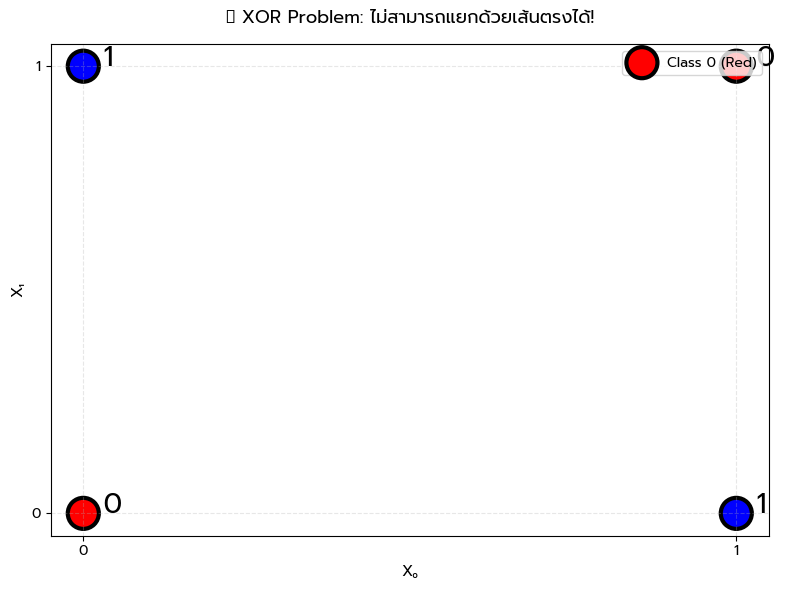


💡 ทำไมต้องใช้ Neural Network?
   • ไม่มีเส้นตรง 1 เส้นที่แยก Red และ Blue ได้
   • ต้องใช้ Non-linear transformation!


In [6]:
# XOR Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

print("✅ XOR Data:")
print("")
for i in range(len(X_xor)):
    print(f"   Input: {X_xor[i]} → Output: {Y_xor[i]}")

# Visualize
plt.figure(figsize=(8, 6))
colors = ['red' if y == 0 else 'blue' for y in Y_xor]
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=500, edgecolors='black', linewidth=3)
plt.title('🔴 XOR Problem: ไม่สามารถแยกด้วยเส้นตรงได้!', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('X₀', fontsize=11)
plt.ylabel('X₁', fontsize=11)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(alpha=0.3, linestyle='--')

# Add labels
for i, txt in enumerate(Y_xor):
    plt.text(X_xor[i, 0], X_xor[i, 1], f'  {txt}', fontsize=20, fontweight='bold')

plt.legend(['Class 0 (Red)', 'Class 1 (Blue)'], loc='upper right')
plt.tight_layout()
plt.show()

print("")
print("💡 ทำไมต้องใช้ Neural Network?")
print("   • ไม่มีเส้นตรง 1 เส้นที่แยก Red และ Blue ได้")
print("   • ต้องใช้ Non-linear transformation!")

### Step 4: Train Neural Network (XOR)

**Architecture**: Input (2) → Hidden (5, ReLU) → Output (1, Sigmoid)

In [7]:
# Initialize weights
W1_xor = np.random.randn(2, 5)
b1_xor = np.zeros(5)
W2_xor = np.random.randn(5)
b2_xor = 0

# Training parameters
learning_rate = 1e-2
regularization = 0.0
epochs = 30000

LL_xor = []  # Track log-likelihoods
accuracies_xor = []  # Track accuracies

print("🏋️ Training Neural Network สำหรับ XOR...\n")

for i in range(epochs):
    # Forward pass
    pY, Z = forward(X_xor, W1_xor, b1_xor, W2_xor, b2_xor)
    
    # Calculate metrics
    ll = get_log_likelihood(Y_xor, pY)
    prediction = predict(X_xor, W1_xor, b1_xor, W2_xor, b2_xor)
    accuracy = np.mean(prediction == Y_xor)
    
    LL_xor.append(ll)
    accuracies_xor.append(accuracy)
    
    # Backpropagation
    gW2 = derivative_w2(Z, Y_xor, pY)
    gb2 = derivative_b2(Y_xor, pY)
    gW1 = derivative_w1(X_xor, Z, Y_xor, pY, W2_xor)
    gb1 = derivative_b1(Z, Y_xor, pY, W2_xor)
    
    # Update weights (Gradient Ascent for Log-Likelihood)
    W2_xor += learning_rate * (gW2 - regularization * W2_xor)
    b2_xor += learning_rate * (gb2 - regularization * b2_xor)
    W1_xor += learning_rate * (gW1 - regularization * W1_xor)
    b1_xor += learning_rate * (gb1 - regularization * b1_xor)
    
    # Print progress
    if i % 5000 == 0:
        print(f"Epoch {i:5d} | LL: {ll:8.4f} | Accuracy: {accuracy:.4f}")

print("\n✅ Training เสร็จแล้ว!")
print(f"")
print(f"📊 Final Results:")
print(f"   • Log-Likelihood: {LL_xor[-1]:.4f}")
print(f"   • Accuracy: {accuracies_xor[-1]:.4f} ({accuracies_xor[-1]*100:.1f}%)")
print(f"")
print(f"🎯 Predictions:")
final_pred_xor = predict(X_xor, W1_xor, b1_xor, W2_xor, b2_xor)
for i in range(len(X_xor)):
    status = "✅" if final_pred_xor[i] == Y_xor[i] else "❌"
    print(f"   {X_xor[i]} → True: {Y_xor[i]}, Pred: {int(final_pred_xor[i])} {status}")

🏋️ Training Neural Network สำหรับ XOR...

Epoch     0 | LL:  -5.4682 | Accuracy: 0.5000
Epoch  5000 | LL:  -0.0563 | Accuracy: 1.0000
Epoch  5000 | LL:  -0.0563 | Accuracy: 1.0000
Epoch 10000 | LL:  -0.0231 | Accuracy: 1.0000
Epoch 10000 | LL:  -0.0231 | Accuracy: 1.0000
Epoch 15000 | LL:  -0.0141 | Accuracy: 1.0000
Epoch 15000 | LL:  -0.0141 | Accuracy: 1.0000
Epoch 20000 | LL:  -0.0101 | Accuracy: 1.0000
Epoch 20000 | LL:  -0.0101 | Accuracy: 1.0000
Epoch 25000 | LL:  -0.0078 | Accuracy: 1.0000
Epoch 25000 | LL:  -0.0078 | Accuracy: 1.0000

✅ Training เสร็จแล้ว!

📊 Final Results:
   • Log-Likelihood: -0.0063
   • Accuracy: 1.0000 (100.0%)

🎯 Predictions:
   [0 0] → True: 0, Pred: 0 ✅
   [0 1] → True: 1, Pred: 1 ✅
   [1 0] → True: 1, Pred: 1 ✅
   [1 1] → True: 0, Pred: 0 ✅

✅ Training เสร็จแล้ว!

📊 Final Results:
   • Log-Likelihood: -0.0063
   • Accuracy: 1.0000 (100.0%)

🎯 Predictions:
   [0 0] → True: 0, Pred: 0 ✅
   [0 1] → True: 1, Pred: 1 ✅
   [1 0] → True: 1, Pred: 1 ✅
   [1 1]

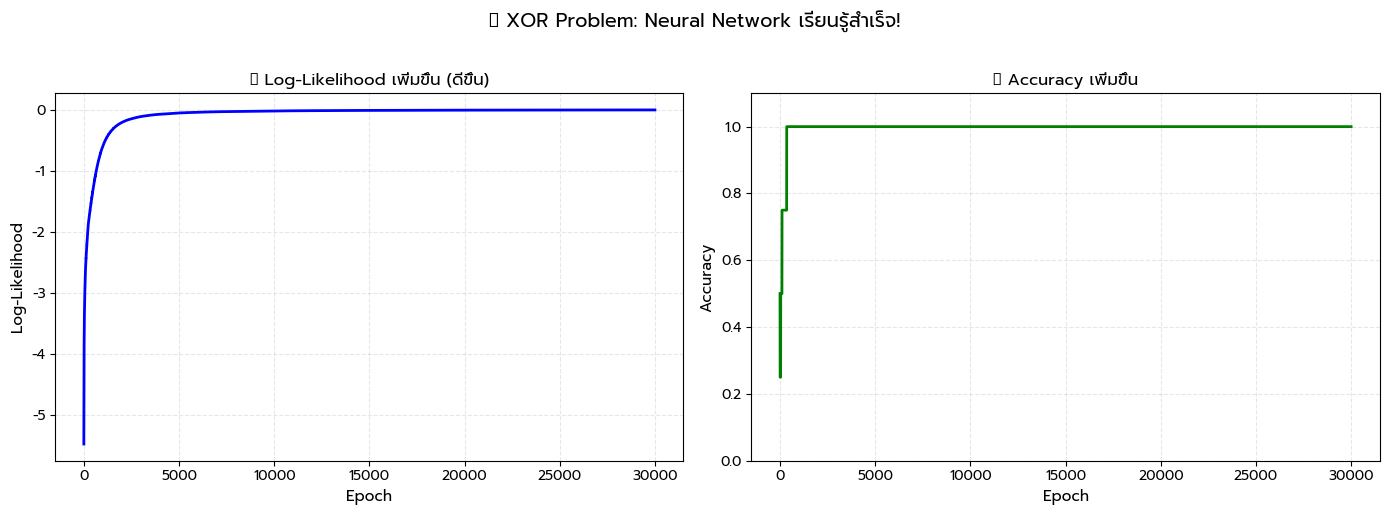

💡 Neural Network แก้ XOR ได้แล้ว!
   • Accuracy = 100% → ทุก point ถูกต้อง
   • เรียนรู้ non-linear decision boundary


In [8]:
# Plot XOR Training Progress
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Log-Likelihood
ax[0].plot(LL_xor, linewidth=2, color='blue')
ax[0].set_xlabel('Epoch', fontsize=11)
ax[0].set_ylabel('Log-Likelihood', fontsize=11)
ax[0].set_title('📈 Log-Likelihood เพิ่มขึ้น (ดีขึ้น)', fontsize=12, fontweight='bold')
ax[0].grid(alpha=0.3, linestyle='--')

# Plot 2: Accuracy
ax[1].plot(accuracies_xor, linewidth=2, color='green')
ax[1].set_xlabel('Epoch', fontsize=11)
ax[1].set_ylabel('Accuracy', fontsize=11)
ax[1].set_title('🎯 Accuracy เพิ่มขึ้น', fontsize=12, fontweight='bold')
ax[1].set_ylim([0, 1.1])
ax[1].grid(alpha=0.3, linestyle='--')

plt.suptitle('🔴 XOR Problem: Neural Network เรียนรู้สำเร็จ!', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 Neural Network แก้ XOR ได้แล้ว!")
print("   • Accuracy = 100% → ทุก point ถูกต้อง")
print("   • เรียนรู้ non-linear decision boundary")

## 🍩 Problem 2: Donut (Concentric Circles)

### Step 5: สร้างข้อมูล Donut

**ข้อมูล**:
- Inner circle (radius ≈ 5) → Class 0
- Outer circle (radius ≈ 10) → Class 1

In [9]:
# Donut Data Parameters
N = 1000
R_inner = 5
R_outer = 10

# Inner Circle (Class 0)
R1 = np.random.randn(N//2) + R_inner
theta1 = 2 * np.pi * np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta1)], [R1 * np.sin(theta1)]]).T

# Outer Circle (Class 1)
R2 = np.random.randn(N//2) + R_outer
theta2 = 2 * np.pi * np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta2)], [R2 * np.sin(theta2)]]).T

# Combine
X_donut = np.concatenate([X_inner, X_outer])
Y_donut = np.array([0] * (N//2) + [1] * (N//2))

print(f"✅ Donut Data สร้างเรียบร้อย!")
print(f"   • Inner circle: {N//2} samples (Class 0)")
print(f"   • Outer circle: {N//2} samples (Class 1)")
print(f"   • Total: {N} samples")

✅ Donut Data สร้างเรียบร้อย!
   • Inner circle: 500 samples (Class 0)
   • Outer circle: 500 samples (Class 1)
   • Total: 1000 samples


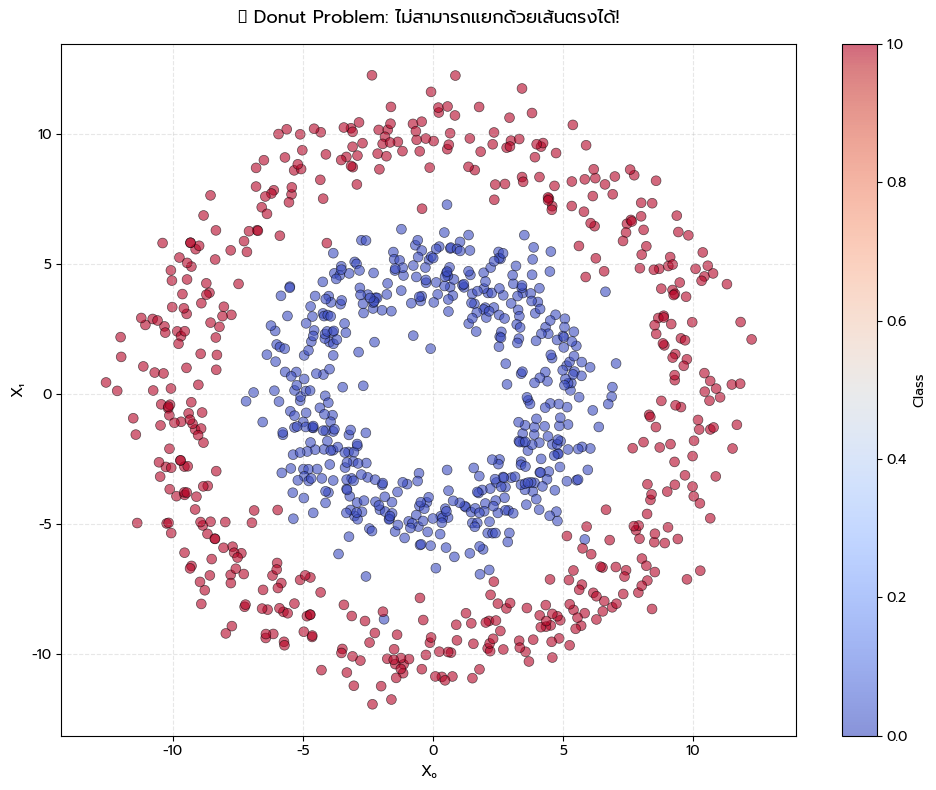


💡 ทำไมต้องใช้ Neural Network?
   • ไม่มีเส้นตรงที่แยก Inner และ Outer circle ได้
   • ต้องเรียนรู้ circular decision boundary!


In [10]:
# Visualize Donut
plt.figure(figsize=(10, 8))
plt.scatter(X_donut[:, 0], X_donut[:, 1], c=Y_donut, s=50, alpha=0.6, 
            cmap='coolwarm', edgecolors='black', linewidth=0.5)
plt.title('🍩 Donut Problem: ไม่สามารถแยกด้วยเส้นตรงได้!', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('X₀', fontsize=11)
plt.ylabel('X₁', fontsize=11)
plt.colorbar(label='Class')
plt.grid(alpha=0.3, linestyle='--')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("")
print("💡 ทำไมต้องใช้ Neural Network?")
print("   • ไม่มีเส้นตรงที่แยก Inner และ Outer circle ได้")
print("   • ต้องเรียนรู้ circular decision boundary!")

### Step 6: Train Neural Network (Donut)

**Architecture**: Input (2) → Hidden (8, ReLU) → Output (1, Sigmoid)

In [11]:
# Initialize weights
n_hidden = 8
W1_donut = np.random.randn(2, n_hidden)
b1_donut = np.random.randn(n_hidden)
W2_donut = np.random.randn(n_hidden)
b2_donut = np.random.randn(1)

# Training parameters
learning_rate = 0.00005
regularization = 0.2
epochs = 3000

LL_donut = []  # Track log-likelihoods
accuracies_donut = []  # Track accuracies

print("🏋️ Training Neural Network สำหรับ Donut...\n")

for i in range(epochs):
    # Forward pass
    pY, Z = forward(X_donut, W1_donut, b1_donut, W2_donut, b2_donut)
    
    # Calculate metrics
    ll = get_log_likelihood(Y_donut, pY)
    prediction = predict(X_donut, W1_donut, b1_donut, W2_donut, b2_donut)
    accuracy = 1 - np.abs(prediction - Y_donut).mean()
    
    LL_donut.append(ll)
    accuracies_donut.append(accuracy)
    
    # Backpropagation
    gW2 = derivative_w2(Z, Y_donut, pY)
    gb2 = derivative_b2(Y_donut, pY)
    gW1 = derivative_w1(X_donut, Z, Y_donut, pY, W2_donut)
    gb1 = derivative_b1(Z, Y_donut, pY, W2_donut)
    
    # Update weights (Gradient Ascent + L2 Regularization)
    W2_donut += learning_rate * (gW2 - regularization * W2_donut)
    b2_donut += learning_rate * (gb2 - regularization * b2_donut)
    W1_donut += learning_rate * (gW1 - regularization * W1_donut)
    b1_donut += learning_rate * (gb1 - regularization * b1_donut)
    
    # Print progress
    if i % 300 == 0:
        print(f"Epoch {i:4d} | LL: {ll:10.2f} | Accuracy: {accuracy:.4f}")

print("\n✅ Training เสร็จแล้ว!")
print(f"")
print(f"📊 Final Results:")
print(f"   • Log-Likelihood: {LL_donut[-1]:.2f}")
print(f"   • Accuracy: {accuracies_donut[-1]:.4f} ({accuracies_donut[-1]*100:.1f}%)")

🏋️ Training Neural Network สำหรับ Donut...

Epoch    0 | LL:   -6277.40 | Accuracy: 0.5000
Epoch  300 | LL:    -156.45 | Accuracy: 0.9880
Epoch  600 | LL:     -78.34 | Accuracy: 0.9920
Epoch  900 | LL:     -55.31 | Accuracy: 0.9910
Epoch 1200 | LL:     -45.22 | Accuracy: 0.9920
Epoch 1500 | LL:     -39.16 | Accuracy: 0.9930
Epoch  900 | LL:     -55.31 | Accuracy: 0.9910
Epoch 1200 | LL:     -45.22 | Accuracy: 0.9920
Epoch 1500 | LL:     -39.16 | Accuracy: 0.9930
Epoch 1800 | LL:     -35.29 | Accuracy: 0.9920
Epoch 2100 | LL:     -32.46 | Accuracy: 0.9920
Epoch 1800 | LL:     -35.29 | Accuracy: 0.9920
Epoch 2100 | LL:     -32.46 | Accuracy: 0.9920
Epoch 2400 | LL:     -30.42 | Accuracy: 0.9920
Epoch 2700 | LL:     -28.86 | Accuracy: 0.9920

✅ Training เสร็จแล้ว!

📊 Final Results:
   • Log-Likelihood: -27.63
   • Accuracy: 0.9930 (99.3%)
Epoch 2400 | LL:     -30.42 | Accuracy: 0.9920
Epoch 2700 | LL:     -28.86 | Accuracy: 0.9920

✅ Training เสร็จแล้ว!

📊 Final Results:
   • Log-Likeliho

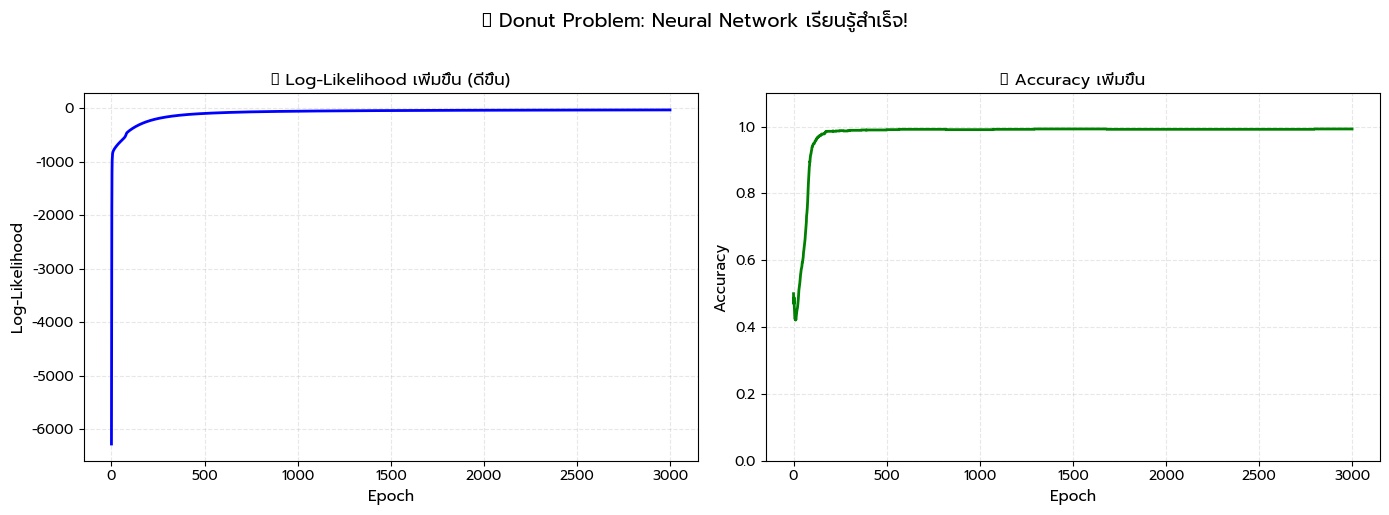

In [12]:
# Plot Donut Training Progress
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Log-Likelihood
ax[0].plot(LL_donut, linewidth=2, color='blue')
ax[0].set_xlabel('Epoch', fontsize=11)
ax[0].set_ylabel('Log-Likelihood', fontsize=11)
ax[0].set_title('📈 Log-Likelihood เพิ่มขึ้น (ดีขึ้น)', fontsize=12, fontweight='bold')
ax[0].grid(alpha=0.3, linestyle='--')

# Plot 2: Accuracy
ax[1].plot(accuracies_donut, linewidth=2, color='green')
ax[1].set_xlabel('Epoch', fontsize=11)
ax[1].set_ylabel('Accuracy', fontsize=11)
ax[1].set_title('🎯 Accuracy เพิ่มขึ้น', fontsize=12, fontweight='bold')
ax[1].set_ylim([0, 1.1])
ax[1].grid(alpha=0.3, linestyle='--')

plt.suptitle('🍩 Donut Problem: Neural Network เรียนรู้สำเร็จ!', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

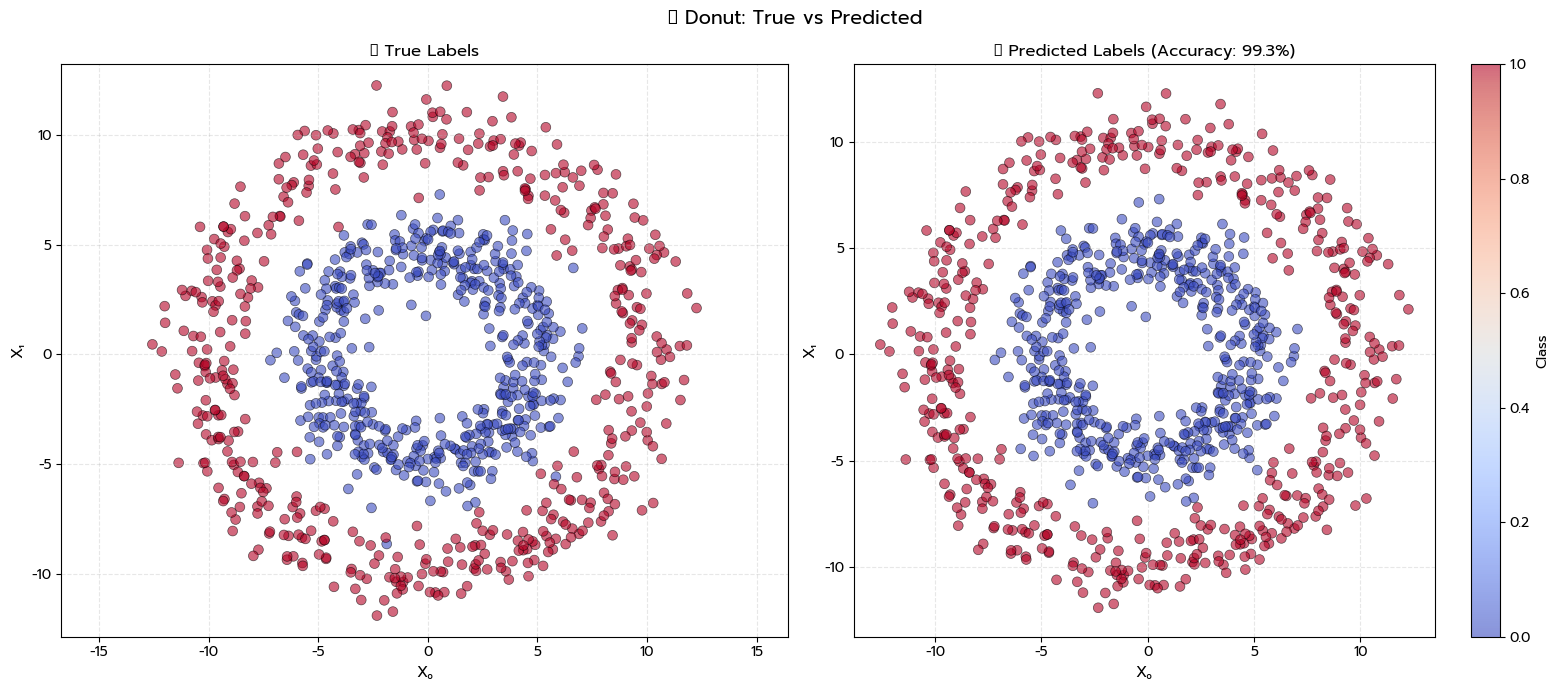

💡 Neural Network เรียนรู้ circular boundary ได้แล้ว!
   • แยก Inner และ Outer circle ได้อย่างแม่นยำ
   • Decision boundary เป็นวงกลม (non-linear)


In [13]:
# Visualize Predictions
final_pred_donut = predict(X_donut, W1_donut, b1_donut, W2_donut, b2_donut)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: True Labels
ax[0].scatter(X_donut[:, 0], X_donut[:, 1], c=Y_donut, s=50, alpha=0.6,
              cmap='coolwarm', edgecolors='black', linewidth=0.5)
ax[0].set_title('✅ True Labels', fontsize=12, fontweight='bold')
ax[0].set_xlabel('X₀', fontsize=11)
ax[0].set_ylabel('X₁', fontsize=11)
ax[0].grid(alpha=0.3, linestyle='--')
ax[0].axis('equal')

# Plot 2: Predicted Labels
scatter = ax[1].scatter(X_donut[:, 0], X_donut[:, 1], c=final_pred_donut, s=50, alpha=0.6,
                        cmap='coolwarm', edgecolors='black', linewidth=0.5)
ax[1].set_title(f'🔮 Predicted Labels (Accuracy: {accuracies_donut[-1]*100:.1f}%)', 
                fontsize=12, fontweight='bold')
ax[1].set_xlabel('X₀', fontsize=11)
ax[1].set_ylabel('X₁', fontsize=11)
ax[1].grid(alpha=0.3, linestyle='--')
ax[1].axis('equal')

plt.colorbar(scatter, ax=ax[1], label='Class')
plt.suptitle('🎯 Donut: True vs Predicted', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("💡 Neural Network เรียนรู้ circular boundary ได้แล้ว!")
print("   • แยก Inner และ Outer circle ได้อย่างแม่นยำ")
print("   • Decision boundary เป็นวงกลม (non-linear)")

## 🎓 สรุปสุดท้าย: XOR & Donut Problems

### 🔑 Key Takeaways:

#### 1️⃣ **ทำไมต้องใช้ Neural Network?**

**Linear Models ไม่เพียงพอ**:
- Logistic Regression = เส้นตรง 1 เส้น
- XOR + Donut = **Non-linear** problems
- ต้องใช้ Neural Network เพื่อ learn **non-linear transformations**

---

#### 2️⃣ **XOR Problem**:

| Input | Output | ทำไมยาก? |
|-------|--------|----------|
| (0,0) | 0 | ไม่มีเส้นตรงแยก |
| (0,1) | 1 | 4 points นี้ได้ |
| (1,0) | 1 | ต้องใช้ hidden layer |
| (1,1) | 0 | เพื่อ transform space |

**Solution**:
- Hidden layer เรียนรู้ features ใหม่
- Transform input space → linearly separable
- Output layer ใช้เส้นตรงแยกใน new space

---

#### 3️⃣ **Donut Problem**:

**Challenge**:
- Inner circle (Class 0) ล้อมรอบด้วย Outer circle (Class 1)
- ไม่มีเส้นตรงแยกได้
- ต้องใช้ circular decision boundary

**Solution**:
- Neural Network เรียนรู้ circular patterns
- Hidden neurons capture different aspects of circle
- Combine → create circular boundary

---

#### 4️⃣ **Binary Classification Architecture**:

```
Input (2D) → Hidden (M, ReLU) → Output (1, Sigmoid)
```

**Key Differences from Multi-Class**:

| | Binary | Multi-Class |
|---|--------|-------------|
| **Output Neurons** | 1 | K |
| **Activation** | Sigmoid | Softmax |
| **Output Range** | [0, 1] | [0, 1]ᴷ (sum=1) |
| **Loss** | Binary Cross-Entropy | Categorical Cross-Entropy |
| **Prediction** | round(Y) | argmax(Y) |

---

### 💡 สิ่งที่เรียนรู้:

#### ✅ **Non-Linear Problems**:
- XOR และ Donut = ปัญหาที่ Linear Models แก้ไม่ได้
- Neural Network เรียนรู้ non-linear transformations
- Hidden layers = feature learners

#### ✅ **Binary Classification**:
- Output = 1 neuron with Sigmoid
- Loss = Binary Cross-Entropy (Log-Likelihood)
- Prediction = round(Y) → 0 or 1

#### ✅ **Training Process**:
- Forward Pass → Calculate Loss → Backpropagation → Update Weights
- Gradient Ascent สำหรับ Log-Likelihood (ยิ่งสูงยิ่งดี)
- Regularization ป้องกัน overfitting

---

### 🚀 ขั้นตอนต่อไป:

#### 1️⃣ **ลอง Hidden Layers อื่น**:
```python
# เปลี่ยนจำนวน neurons
W1 = np.random.randn(2, 10)  # 10 hidden neurons
W1 = np.random.randn(2, 20)  # 20 hidden neurons

# ลอง deeper networks
# Input → Hidden1 → Hidden2 → Output
```

#### 2️⃣ **ลอง Activation อื่น**:
```python
# แทน ReLU ด้วย:
Z = np.tanh(X.dot(W1) + b1)              # Tanh
Z = 1 / (1 + np.exp(-(X.dot(W1) + b1)))  # Sigmoid
```

#### 3️⃣ **ลองปัญหาอื่น**:
- **Spiral**: 2 spirals intertwined
- **Checkerboard**: alternating squares
- **Moon**: two half-moon shapes

#### 4️⃣ **Visualize Decision Boundary**:
```python
# สร้าง mesh grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# ทำนาย
Z_grid = predict(X_grid, W1, b1, W2, b2)
Z_grid = Z_grid.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z_grid, alpha=0.3)
```

---

### 📚 เปรียบเทียบกับ Notebooks อื่น:

| Notebook | Problem Type | Output | Loss |
|----------|--------------|--------|------|
| **forwardprop** | Multi-class | K neurons (Softmax) | Categorical CE |
| **backprop** | Multi-class | K neurons (Softmax) | Categorical CE |
| **xor_donut** (นี่!) | **Binary** | **1 neuron (Sigmoid)** | **Binary CE** |
| **regression** | Regression | 1 neuron (Linear) | MSE |

---

## 🎉 สรุปสั้นๆ:

> **"Neural Networks เรียนรู้ Non-Linear Patterns ได้!"**

**ปัญหาที่แก้**:
1. **XOR** - Logic gate ที่ Linear Model แก้ไม่ได้
2. **Donut** - Circular patterns (concentric circles)

**วิธีแก้**:
- Hidden layers เรียนรู้ **non-linear transformations**
- Transform input space → linearly separable
- Output layer ใช้เส้นตรงแยกใน new space

**Binary Classification**:
- Output: 1 neuron (Sigmoid) → probability [0, 1]
- Loss: Binary Cross-Entropy (Log-Likelihood)
- Prediction: round(Y) → 0 or 1

**ผลลัพธ์**:
- ✅ XOR: Accuracy = 100% (4/4 correct)
- ✅ Donut: Accuracy ~95-99%
- ✅ Neural Network เรียนรู้ non-linear boundaries สำเร็จ!

---

### 🤔 คำถามท้ายบท:

1. **ทำไม XOR ต้องใช้ Neural Network?**
   - ไม่มีเส้นตรง 1 เส้นที่แยก 4 points ได้
   - Hidden layer transform space → linearly separable

2. **Binary vs Multi-Class Classification?**
   - Binary: 1 output (Sigmoid), threshold at 0.5
   - Multi-Class: K outputs (Softmax), argmax

3. **ทำไมใช้ Log-Likelihood แทน Loss?**
   - Log-Likelihood = -Loss (negative)
   - Maximize LL = Minimize Loss
   - เหมือนกัน แค่เครื่องหมายต่างกัน

4. **Hidden layers ทำอะไร?**
   - เรียนรู้ features ใหม่ (automatic feature engineering)
   - Transform input space
   - ทำให้ปัญหา non-linear → linear

✨ **Happy Learning with Non-Linear Problems!** ✨